 Multi-layer Perceptron for Regression

In this notebook, we will perform Ames house price prediction using Deep Learning models.


## Table of Content
   
   
1. [Preparation](#cell_Preparation)    
    
    
2. [Ames real-estate data](#cell_Ames)


3. [Deep Learning with Sequential Model](#cell_deep)


<a id = "cell_Preparation"></a>
## 1. Preparation

Load some standard Python libraries.

In [1]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Next, load `Sklearn` and its wrappers

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

Some options to control Pandas display

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id = "cell_Ames"></a>
## 2. Ames real-estate data

Upload the provided data set `ames_house_data.csv` to Google Colab and run the below code.

In [8]:
ames_data_org = pd.read_csv("/content/AmesHousing.csv")
ames_data_org.set_index('PID', inplace=True)
ames_data_org.head(10)
print('Number of records read: ', ames_data_org.size)

Number of records read:  237330


Find the column types and the number of missing values in each column<br>
Note that we can also use: `ames_data_org.info()`

In [9]:
# Finding column types
ames_data_org.dtypes

,0
Order,int64
MS SubClass,int64
MS Zoning,object
Lot Frontage,float64
Lot Area,int64
Street,object
Alley,object
Lot Shape,object
Land Contour,object
Utilities,object


In [10]:
# Identification of missing values
missing = ames_data_org.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(ascending=False)

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Cond,159
Garage Yr Blt,159


Drop columns with lots of missing values then show statistics about each column.

In [12]:
ames_data_org.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu'], axis=1, inplace=True)
ames_data_org.describe(include='all')

,Order,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2930.000000,2930,2440.000000,2930.000000,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930,2930,1155,2907.000000,2930,2930,2930,2850,2850,2847,2850,2929.000000,2849,2929.000000,2929.000000,2929.000000,2930,2930,2930,2929,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930.000000,2930,2930.000000,2773,2771.000000,2771,2929.000000,2929.000000,2771,2771,2930,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,7,NaN,NaN,2,4,4,3,5,3,28,9,8,5,8,NaN,NaN,NaN,NaN,6,8,16,17,4,NaN,4,5,6,5,5,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,8,NaN,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,GLQ,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,2273,NaN,NaN,2918,1859,2633,2927,2140,2789,443,2522,2900,2425,1481,NaN,NaN,NaN,NaN,2321,2887,1026,1015,880,NaN,1799,2549,1310,1283,2616,1906,859,NaN,2499,NaN,NaN,NaN,2885,1495,2734,2682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1494,NaN,2728,NaN,1731,NaN,1231,NaN,NaN,2615,2665,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.094881,5.563140,1971.356314,1984.266553,NaN,NaN,NaN,NaN,NaN,101.896801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.629566,NaN,49.722431,559.262547,1051.614544,NaN,NaN,NaN,NaN,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,NaN,6.443003,NaN,0.599317,NaN,1978.132443,NaN,1.766815,472.819734,NaN,NaN,NaN,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.411026,1.111537,30.245361,20.860286,NaN,NaN,NaN,NaN,NaN,179.112611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.590839,NaN,169.168476,439.494153,440.615067,NaN,NaN,NaN,NaN,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,NaN,1.572964,NaN,0.647921,NaN,25.528411,NaN,0.760566,215.046549,NaN,NaN,NaN,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,1895.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000

Select numeric columns and a few "promising" one-hot-encoded categorical variables.<br>
Note to avoid those columns with huge class unbalance, i.e. those where `freq` is approximately `equal` to count!

In [14]:
ames_data_num = ames_data_org.select_dtypes(include='number')
ames_data_hstyle= pd.get_dummies(ames_data_org['House Style'], prefix='HStyle')
ames_data_area= pd.get_dummies(ames_data_org['Neighborhood'], prefix='Area')
ames_data = pd.concat([ames_data_num, ames_data_hstyle, ames_data_area], axis=1, join='inner')
label_col = 'SalePrice'
ames_data.head(10)

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,HStyle_1.5Fin,HStyle_1.5Unf,HStyle_1Story,HStyle_2.5Fin,HStyle_2.5Unf,HStyle_2Story,HStyle_SFoyer,HStyle_SLvl,Area_Blmngtn,Area_Blueste,Area_BrDale,Area_BrkSide,Area_ClearCr,Area_CollgCr,Area_Crawfor,Area_Edwards,Area_Gilbert,Area_Greens,Area_GrnHill,Area_IDOTRR,Area_Landmrk,Area_MeadowV,Area_Mitchel,Area_NAmes,Area_NPkVill,Area_NWAmes,Area_NoRidge,Area_NridgHt,Area_OldTown,Area_SWISU,Area_Sawyer,Area_SawyerW,Area_Somerst,Area_StoneBr,Area_Timber,Area_Veenker
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
526301100,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,1960.0,2.0,528.0,210,62,0,0,0,0,0,5,2010,215000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
526350040,2,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,105000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
526351010,3,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,172000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
526353030,4,20,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,1968.0,2.0,522.0,0,0,0,0,0,0,0,4,2010,244000,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
527105010,5,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,189900,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
527105030,6,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,195500,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
527127150,7,120,41.0,4920,8,5,2001,2001,0.0,616.0,0.0,722.0,1338.0,1338,0,0,1338,1.0,0.0,2,0,2,1,6,0,2001.0,2.0,582.0,0,0,170,0,0,0,0,4,2010,213500,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
527145080,8,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,191500,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
527146030,9,120,39.0,5389,8,5,1995,1996,0.0,1180.0,0.0,415.0,1595.0,1616,0,0,1616,1.0,

Split data for training and validation. Split index ranges into three parts, however, ignore the third.

In [15]:
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
ames_train, ames_valid = train_test_split(ames_data,
                                      test_size=valid_size,
                                      random_state=2020)

Extract data for training and validation into x and y vectors.

In [16]:
ames_y_train = ames_train[[label_col]]
ames_x_train = ames_train.drop(label_col, axis=1)
ames_y_valid = ames_valid[[label_col]]
ames_x_valid = ames_valid.drop(label_col, axis=1)

print('Size of training set: ', len(ames_x_train))
print('Size of validation set: ', len(ames_x_valid))

Size of training set:  2051
Size of validation set:  879


Before the data can be applied to a deep learning model. Missing values needs to be dealed with, and the data needs to be scaled to `[-1,1]` range.

Create an imputation model using training set and use it to impute both training and validation data.

In [17]:
print('Missing training values before imputation = ', ames_x_train.isnull().sum().sum())
print('Missing validation values before imputation = ', ames_x_valid.isnull().sum().sum())

imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(ames_x_train)
ames_x_train = pd.DataFrame(imputer.transform(ames_x_train),
                            columns = ames_x_train.columns, index = ames_x_train.index)
ames_x_valid = pd.DataFrame(imputer.transform(ames_x_valid),
                            columns = ames_x_valid.columns, index = ames_x_valid.index)

print('Missing training values after imputation = ', ames_x_train.isnull().sum().sum())
print('Missing validation values after imputation = ', ames_x_valid.isnull().sum().sum())

Missing training values before imputation =  472
Missing validation values before imputation =  210
Missing training values after imputation =  0
Missing validation values after imputation =  0


Next, create a scaling model using training set and use it to scale both training and validation data.

In [18]:
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(ames_x_train)
ames_x_train = pd.DataFrame(scaler.transform(ames_x_train),
                            columns = ames_x_train.columns, index = ames_x_train.index)
ames_x_valid = pd.DataFrame(scaler.transform(ames_x_valid),
                            columns = ames_x_valid.columns, index = ames_x_valid.index)

print('X train min =', round(ames_x_train.min().min(),4), '; max =', round(ames_x_train.max().max(), 4))
print('X valid min =', round(ames_x_valid.min().min(),4), '; max =', round(ames_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.1111 ; max = 1.3333


In [19]:
ames_x_valid.head(10)

,Order,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,HStyle_1.5Fin,HStyle_1.5Unf,HStyle_1Story,HStyle_2.5Fin,HStyle_2.5Unf,HStyle_2Story,HStyle_SFoyer,HStyle_SLvl,Area_Blmngtn,Area_Blueste,Area_BrDale,Area_BrkSide,Area_ClearCr,Area_CollgCr,Area_Crawfor,Area_Edwards,Area_Gilbert,Area_Greens,Area_GrnHill,Area_IDOTRR,Area_Landmrk,Area_MeadowV,Area_Mitchel,Area_NAmes,Area_NPkVill,Area_NWAmes,Area_NoRidge,Area_NridgHt,Area_OldTown,Area_SWISU,Area_Sawyer,Area_SawyerW,Area_Somerst,Area_StoneBr,Area_Timber,Area_Veenker
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
534450180,0.044042,0.000000,0.099315,0.027610,0.444444,0.75,0.623188,0.966667,0.000000,0.123317,0.000000,0.075244,0.140426,0.112500,0.000000,0.0,0.086151,0.333333,0.0,0.25,0.0,0.333333,0.333333,0.111111,0.00,0.266777,0.00,0.000000,0.082163,0.000000,0.0,0.0,0.000000,0.0,0.0,0.090909,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905101310,0.074087,0.411765,0.174658,0.044301,0.333333,0.50,0.695652,0.300000,0.000000,0.000000,0.000000,0.821180,0.289362,0.323148,0.000000,0.0,0.259981,0.000000,0.0,0.50,0.0,0.666667,0.666667,0.555556,0.00,0.266777,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.272727,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
533127080,0.853875,0.235294,0.166376,0.061890,0.777778,0.75,0.876812,0.716667,0.000000,0.179305,0.000000,0.151417,0.218985,0.226852,0.565617,0.0,0.403629,0.333333,0.0,0.50,0.5,0.833333,0.333333,0.777778,0.25,0.314103,0.75,0.534946,0.146770,0.074124,0.0,0.0,0.000000,0.0,0.0,0.909091,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
908276150,0.307614,0.000000,0.166376,0.035645,0.333333,0.25,0.608696,0.100000,0.000000,0.000000,0.000000,0.312123,0.109984,0.136111,0.000000,0.0,0.105635,0.000000,0.0,0.25,0.0,0.500000,0.333333,0.222222,0.00,0.195513,0.25,0.193548,0.044944,0.000000,0.0,0.0,0.277778,0.0,0.0,0.818182,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902330040,0.245476,0.294118,0.342466,0.076520,0.777778,1.00,0.072464,0.600000,0.000000,0.038271,0.000000,0.325128,0.149918,0.125926,0.400000,0.0,0.255014,0.000000,0.0,0.25,0.5,0.666667,0.333333,0.555556,0.25,0.096154,0.50,0.284946,0.000000,0.227763,0.0,0.0,0.000000,0.0,0.0,0.909091,0.75,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
907135040,0.286787,0.000000,0.311644,0.044680,0.444444,0.50,0.884058,0.750000,0.000000,0.000000,0.000000,0.509522,0.179542,0.167824,0.000000,0.0,0.131805,0.000000,0.0,0.25,0.5,0.500000,0.333333,0.333333,0.00,0.320513,0.50,0.451613,0.275281,0.086253,0.0,0.0,0.000000,0.0,0.0,0.454545,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
534431130,0.209286,0.000000,0.160959,0.039580,0.444444,0.50,0.601449,0.083333,0.000000,0.017718,0.177315,0.284719,0.157119,0.136111,0.000000,0.0,0.105635,0.333333,0.0,0.25,0.0,0.333333,0.333333,0.222222,0.00,0.192308,0.25,0.221774,0.000000,0.094340,0.0,0.0,0.000000,0.0,0.0,0.090909,0.75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

<a id = "cell_deep"></a>
## 3. Deep Learning with Sequential Model

Load required libraries for Deep Learning with Sequential model.

In [20]:
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop

Convert pandas data frames to `np` arrays.

In [21]:
arr_x_train = np.array(ames_x_train)
arr_y_train = np.array(ames_y_train)
arr_x_valid = np.array(ames_x_valid)
arr_y_valid = np.array(ames_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (2051, 73)
Training samples:  2051
Validation samples:  879


Create several **Keras models** for experiment purpose.

The first is very simple, consisting of two layers and `Adam` optimizer.

In [22]:
def basic_model_1(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-07, weight_decay=0.0),
        metrics=[metrics.mae])
    return(t_model)

The second with `RMSProp` optimizer consists of 4 layers and the first uses 20% dropouts.

In [23]:
def basic_model_2(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(100, activation="tanh", input_shape=(x_size,)))
    t_model.add(Dropout(0.2))
    t_model.add(Dense(180, activation="relu"))
    t_model.add(Dense(20, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

Now we create the executable model using one of the above functions. Run below code until the end to obtain the result, then change `basic_model_1` to `basic_model_2` and run the code again. Compare the results generated by the two models.

In [24]:
model = basic_model_1(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         7,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,501 (29.30 KB)

 Trainable params: 7,501 (29.30 KB)

 Non-trainable params: 0 (0.00 B)

Specify Keras callbacks which allow additional functionality while the model is being fitted. ***EarlyStopping*** watches one of the model measurements and stops fitting when no improvement.

Fit the model and record the history of training and validation.
As we specified `EarlyStopping` with `patience=20`, with luck the training will stop in less than 200 epochs.

In [25]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=64,
    epochs=500,
    shuffle=True,
    verbose=2,
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
33/33 - 2s - 68ms/step - loss: 39087144960.0000 - mean_absolute_error: 181119.9531 - val_loss: 39015550976.0000 - val_mean_absolute_error: 180029.4844
Epoch 2/500
33/33 - 0s - 5ms/step - loss: 39085264896.0000 - mean_absolute_error: 181114.9844 - val_loss: 39013437440.0000 - val_mean_absolute_error: 180023.9375
Epoch 3/500
33/33 - 0s - 9ms/step - loss: 39082999808.0000 - mean_absolute_error: 181109.0156 - val_loss: 39011028992.0000 - val_mean_absolute_error: 180017.6094
Epoch 4/500
33/33 - 0s - 4ms/step - loss: 39080230912.0000 - mean_absolute_error: 181101.7969 - val_loss: 39007973376.0000 - val_mean_absolute_error: 180009.5781
Epoch 5/500
33/33 - 0s - 5ms/step - loss: 39076900864.0000 - mean_absolute_error: 181093.0312 - val_loss: 39004332032.0000 - val_mean_absolute_error: 180000.0000
Epoch 6/500
33/33 - 0s - 5ms/step - loss: 39073034240.0000 - mean_absolute_error: 181082.8594 - val_loss: 39000174592.0000 - val_mean_absolute_error: 179989.0625
Epoch 7/500
33/33 - 0s - 5m

Evaluate and report performance of the trained model

In [26]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train MAE:  37781.74 , Train Loss:  3830819072.0
Val MAE:  40176.67 , Val Loss:  3982041600.0


Now plot the true vs. predicted values.

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


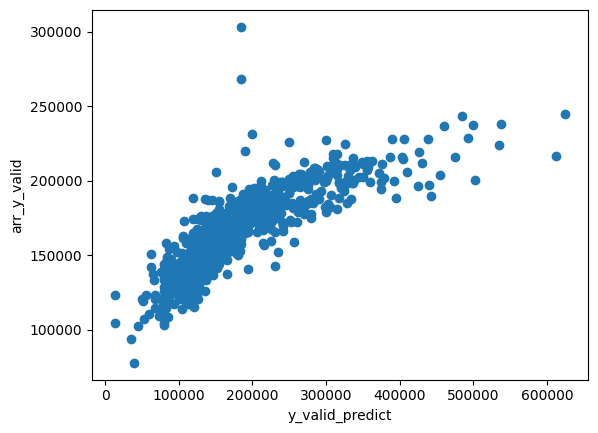

The Correlation between true and predicted values is:  0.825


In [27]:
y_valid_predict = model.predict(arr_x_valid)
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1,879)[0], y_valid_predict.reshape(1,879)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))



Now plot the training history, i.e. the *Mean Absolute Error* and *Loss (Mean Squared Error)*, which were both defined at the time of model compilation.

Note that the plot shows validation error as less than training error, which is quite deceptive. The reason for this is that training error is calculated for the entire epoch (and at its begining it was much worse than at the end), whereas the validation error is taken from the last batch (after the model improved). See the above evaluation statistics to confirm that the evaluation puts these errors in the correct order at the very end.

In [28]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

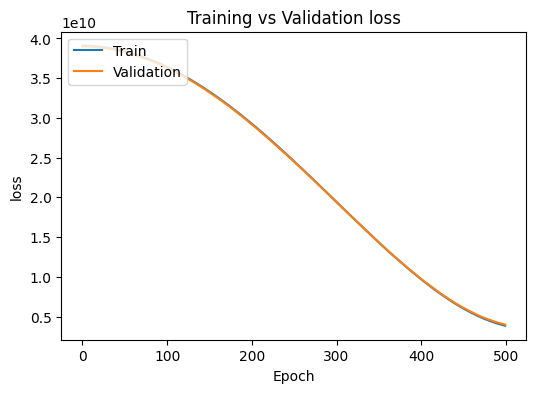

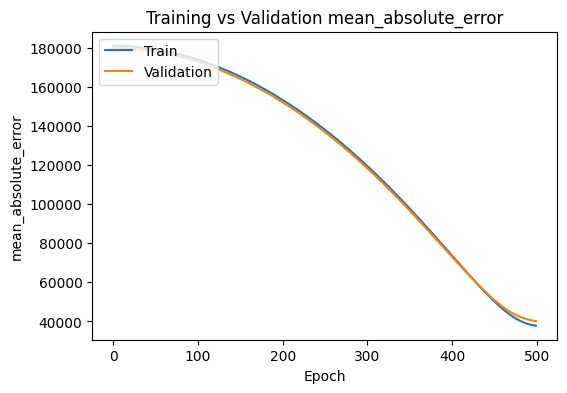

In [29]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)